In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [2]:
def angle_to_eta(theta):
    return LSS_radius*theta#/np.sqrt(4*np.pi)

def Get_Dis(x1,y1, x2,y2):
    return np.math.sqrt( (x1-x2)**2 + (y1-y2)**2 )

def interpolation(x, y):
    return interpolate.interp1d(x, y)

In [3]:
tau_rec = 280.6498259513500
etap = 160
LSS_radius = 13800-280
ang_arr = np.logspace(-3.5, -0.7, num=100)
radius_arr = angle_to_eta(ang_arr) # Mpc

SW_angle_arr = np.loadtxt('../SW_stack.txt')
ISW_angle_arr = np.loadtxt('../ISW_stack.txt')

In [4]:
(SW_angle_arr.T[0]+ISW_angle_arr.T[0])[16:43]

array([20.13473446, 21.45456727, 22.98076514, 24.78200278, 26.95622452,
       29.63908123, 32.92040437, 36.62392676, 40.06986906, 42.32202112,
       42.65948683, 41.0767387 , 38.28435146, 35.20986608, 32.52638659,
       30.40491535, 28.75158039, 27.42801024, 26.33497959, 25.40393617,
       24.58905908, 23.84608087, 23.12802284, 22.38179445, 21.56652219,
       20.67260298, 19.73078483])

In [5]:
radius_arr

array([   4.2753994 ,    4.5630951 ,    4.87015012,    5.19786716,
          5.5476366 ,    5.92094236,    6.31936821,    6.74460453,
          7.19845539,    7.68284632,    8.19983238,    8.75160691,
          9.34051089,    9.96904277,   10.63986916,   11.3558361 ,
         12.11998114,   12.93554623,   13.80599147,   14.7350098 ,
         15.72654266,   16.78479671,   17.91426168,   19.11972943,
         20.40631425,   21.77947459,   23.24503621,   24.80921685,
         26.47865271,   28.2604265 ,   30.16209754,   32.19173384,
         34.35794631,   36.66992527,   39.13747951,   41.77107782,
         44.58189347,   47.58185159,   50.78367975,   54.20096198,
         57.84819639,   61.74085668,   65.89545779,   70.32962598,
         75.06217356,   80.11317879,   85.50407097,   91.25772143,
         97.39854052,  103.95258117,  110.94764947,  118.41342259,
        126.3815747 ,  134.88591136,  143.96251294,  153.6498877 ,
        163.98913514,  175.02412039,  186.80166033,  199.37172

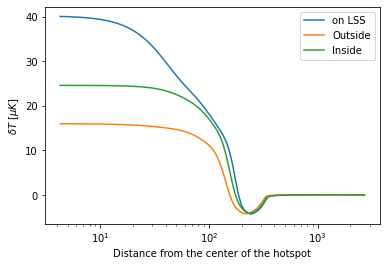

In [6]:
plt.plot(radius_arr, (ISW_angle_arr[24]+SW_angle_arr[24]), label='on LSS')
plt.plot(radius_arr, (ISW_angle_arr[12]+SW_angle_arr[12]), label='Outside')
plt.plot(radius_arr, (ISW_angle_arr[36]+SW_angle_arr[36]), label='Inside')
plt.xscale('log')
plt.xlabel('Distance from the center of the hotspot')
plt.ylabel('$\delta T~[\mu K]$')
plt.legend()

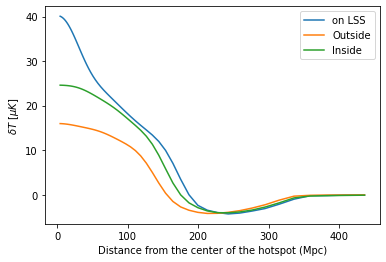

In [7]:
lens = 72
plt.plot(radius_arr[:lens], (ISW_angle_arr[24]+SW_angle_arr[24])[:lens], label='on LSS')
plt.plot(radius_arr[:lens], (ISW_angle_arr[12]+SW_angle_arr[12])[:lens], label='Outside')
plt.plot(radius_arr[:lens], (ISW_angle_arr[36]+SW_angle_arr[36])[:lens], label='Inside')
plt.xlabel('Distance from the center of the hotspot (Mpc)')
plt.ylabel('$\delta T~[\mu K]$')
plt.legend()
plt.savefig("deltaT_vs_radial_eta160.pdf")

In [14]:
pix_arr = np.arange(2,100)*1.9
pix_arr

array([  3.8,   5.7,   7.6,   9.5,  11.4,  13.3,  15.2,  17.1,  19. ,
        20.9,  22.8,  24.7,  26.6,  28.5,  30.4,  32.3,  34.2,  36.1,
        38. ,  39.9,  41.8,  43.7,  45.6,  47.5,  49.4,  51.3,  53.2,
        55.1,  57. ,  58.9,  60.8,  62.7,  64.6,  66.5,  68.4,  70.3,
        72.2,  74.1,  76. ,  77.9,  79.8,  81.7,  83.6,  85.5,  87.4,
        89.3,  91.2,  93.1,  95. ,  96.9,  98.8, 100.7, 102.6, 104.5,
       106.4, 108.3, 110.2, 112.1, 114. , 115.9, 117.8, 119.7, 121.6,
       123.5, 125.4, 127.3, 129.2, 131.1, 133. , 134.9, 136.8, 138.7,
       140.6, 142.5, 144.4, 146.3, 148.2, 150.1, 152. , 153.9, 155.8,
       157.7, 159.6, 161.5, 163.4, 165.3, 167.2, 169.1, 171. , 172.9,
       174.8, 176.7, 178.6, 180.5, 182.4, 184.3, 186.2, 188.1])

In [15]:
pix_temp1 = []
pix_temp2 = []

r1_value = 25   # 24 19 7 15, 30 37 18 8
r2_value = 14
deltax = 18
deltay = 11

for rad in range(1,len(pix_arr)):
    #target = pix_arr[rad]
    #target_index = min(enumerate(radius_arr), key=lambda x: abs(target - x[1]))
    #index = target_index[0]
    #pix_temp1.append(SW_angle_arr[r1_value][index]+ISW_angle_arr[r1_value][index])
    #pix_temp2.append(SW_angle_arr[r2_value][index]+ISW_angle_arr[r2_value][index])
    
    SWprofle1 = interpolation(radius_arr, SW_angle_arr[r1_value])
    ISWprofle1 = interpolation(radius_arr, ISW_angle_arr[r1_value])
    
    SWprofle2 = interpolation(radius_arr, SW_angle_arr[r2_value])
    ISWprofle2 = interpolation(radius_arr, ISW_angle_arr[r2_value])
    
    pix_temp1.append(SWprofle1(pix_arr[rad])+ISWprofle1(pix_arr[rad]))
    pix_temp2.append(SWprofle2(pix_arr[rad])+ISWprofle2(pix_arr[rad]))

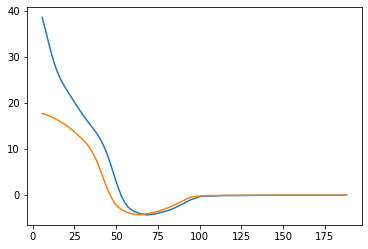

In [16]:
plt.plot(pix_arr[1:], pix_temp1, label='on LSS')
plt.plot(pix_arr[1:], pix_temp2, label='on LSS')

In [18]:
# Create hot spot profile
            
SingleSpot1 = np.zeros((101, 101))
SingleSpot2 = np.zeros((101, 101))


nbin = len(pix_temp1)

# Loop over each bin for a profile function (shape of a hot spot)
for j in range(nbin):
    # A list of positions for each shell of profile
    x_pos = np.empty(0)

    y_pos = np.empty(0)

    # Delta(T) of a given pixel
    result1 = pix_temp1[j]
    result2 = pix_temp2[j]
    #print(str(result))
                
    # Collecting a list of positions for a given shell
    for ii in range (0,101):
        for jj in range (0,101):
            if j <= Get_Dis(51, 51, ii, jj) and Get_Dis(51, 51, ii, jj) < j+1:
                x_pos = np.append(x_pos, ii)
                y_pos = np.append(y_pos, jj)
                
    size_x_pos = len(x_pos)
    
    
    # Injecting a Delta T into the given shell
    for ii in range (0,size_x_pos):
                    
        x_inject = int(x_pos[ii])
        y_inject = int(y_pos[ii])
        
        SingleSpot1[x_inject][y_inject] = SingleSpot1[x_inject][y_inject] + result1
        SingleSpot2[x_inject][y_inject] = SingleSpot2[x_inject][y_inject] + result2

In [19]:
SingleSpot1.max()

38.645855152285364

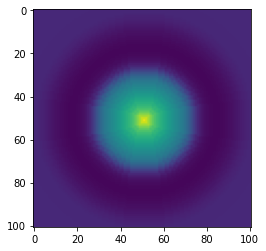

In [39]:
plt.imshow(SingleSpot1,clim=[-5,38])
plt.savefig("On_LSS.pdf")

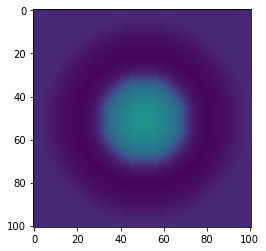

In [40]:
plt.imshow(SingleSpot2,clim=[-5,38])
plt.savefig("Off_LSS.pdf")

In [14]:
framedim = 180
frame = np.zeros((framedim, framedim))
# 1st signal boundary

shiftX = int(framedim/2)
shiftY = int(framedim/2)

spot2X = shiftX+deltax
spot2Y = shiftY+deltay

s1Xmin = shiftX-50
s1Xmax = shiftX+51
s1Ymin = shiftY-50
s1Ymax = shiftY+51

            
#2nd signal boundary
s2Xmin = spot2X-50
s2Xmax = spot2X+51
s2Ymin = spot2Y-50
s2Ymax = spot2Y+51

frame[s1Xmin:s1Xmax, s1Ymin:s1Ymax] += SingleSpot1
frame[s2Xmin:s2Xmax, s2Ymin:s2Ymax] += SingleSpot2

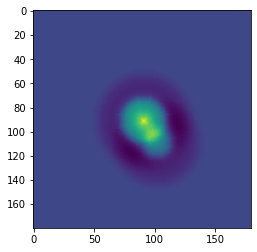

In [15]:
plt.imshow(frame)